In [1]:
# load simulations
# plot some maps
# run fitting of the RSS
# build model map

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context="talk", palette="husl", color_codes=True)

In [2]:
SIM_NAME = "DIG_bright"
EXP_TIME = 900

SIM_PATH = f"_data-sim/{SIM_NAME}/outputs"

SIMPLE_SIM_NAME = f"{SIM_NAME}_linear_full_{EXP_TIME}_flux.fits"

current_sim = SIMPLE_SIM_NAME

In [3]:
import os
from astropy.io import fits


f = fits.open(os.path.join(SIM_PATH, current_sim))

In [4]:
f.info()

Filename: _data-sim/DIG_bright/outputs/DIG_bright_linear_full_900_flux.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      25   ()      
  1  TARGET        1 ImageHDU         9   (12301, 1801)   float32   
  2  TOTAL         1 ImageHDU         9   (12301, 1801)   float32   
  3  ERR           1 ImageHDU         9   (12301, 1801)   float32   
  4  SNR           1 ImageHDU         9   (12301, 1801)   float32   
  5  SKY           1 ImageHDU         9   (12301, 1801)   float32   
  6  WAVE          1 ImageHDU         8   (12301,)   float32   
  7  FIBERID       1 BinTableHDU     27   1801R x 7C   [K, K, K, D, D, D, D]   
  8  WCS           1 ImageHDU        23   ()      


In [5]:
from astropy.table import Table


fiber_map = Table(f["FIBERID"].data)
fiber_map

id,ring,position,x,y,diameter,dispersion
int64,int64,int64,float64,float64,float64,float64
0,1,0,1.546738304939677e-27,0.0,35.3,3.0
1,2,0,18.4999999504005,-32.042939553375824,35.3,3.0
2,2,1,-18.499999950445808,-32.04293955337582,35.3,3.0
3,2,2,36.99999960315852,1.2632342130702194e-11,35.3,3.0
4,2,3,-36.9999996031917,1.2623279744534303e-11,35.3,3.0
5,2,4,18.49999995040049,32.042939553401084,35.3,3.0
6,2,5,-18.499999950445808,32.04293955340108,35.3,3.0
7,3,0,36.99999960315134,-64.0858767868585,35.3,3.0
8,3,1,7.848256766560548e-15,-64.08587781791653,35.3,3.0


(6500.0, 6800.0)

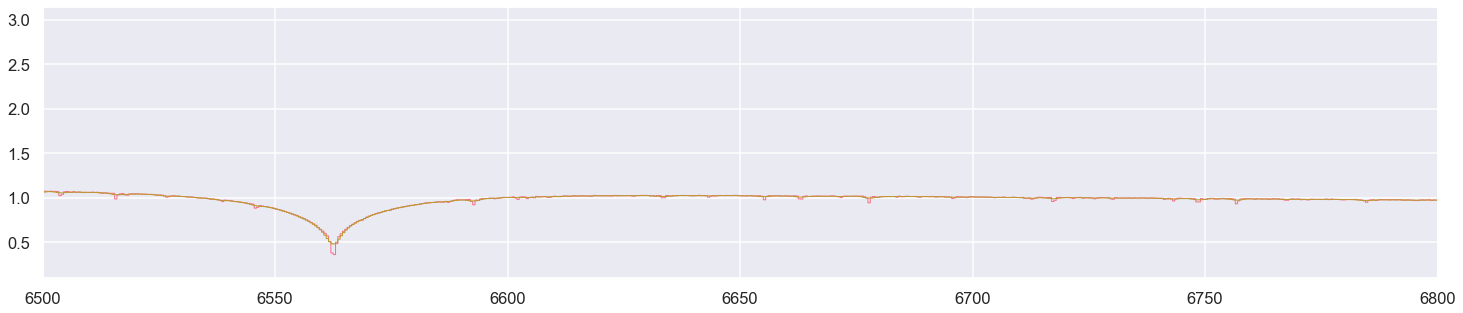

In [32]:
from specutils.manipulation import convolution_smooth, LinearInterpolatedResampler
from specutils.spectra import Spectrum1D
from astropy.convolution import Gaussian1DKernel
from astropy import units as u


id_ = 0
wl__w, f__w = f["WAVE"].data, f["TARGET"].data[id_]
ef__w = f["ERR"].data[id_]
f__w = f__w / np.abs(f__w[f__w.size//2])
ef__w = ef__w / np.abs(f__w[f__w.size//2])

plt.subplots(figsize=(25,5))
plt.step(wl__w, f__w, lw=1)

spectrum = Spectrum1D(f__w*u.erg/u.s/u.cm**2/u.AA, wl__w*u.AA)
kernel = Gaussian1DKernel(stddev=np.sqrt(2.5**2-0.5**2)/2.355/0.5)

f__w = convolution_smooth(spectrum, kernel).data

wl_mask = f__w > 0

plt.step(wl__w, f__w, lw=1)
plt.xlim(6500, 6800)

Analyzing chunk 3650 5500 ...
median_flux:0.0011 sigma_flux:0.2152
found 27 peaks!


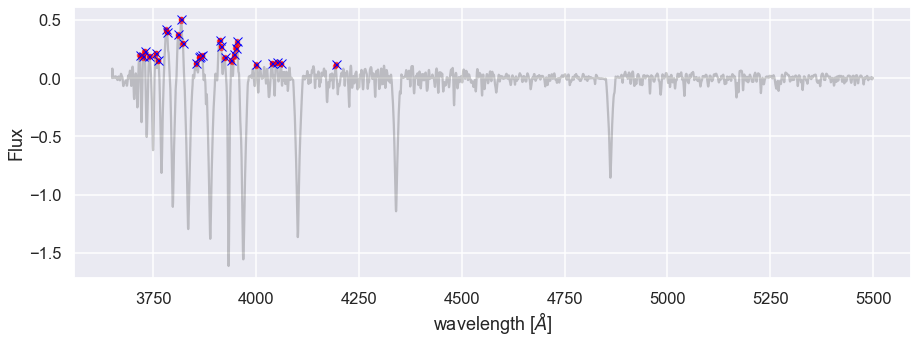

-- List crossmatch currently under develpment.
-- List crossmatch: looking for best redshift...
-- List crossmatch: best redshift for the emission lines: 0.007
list_eml_compare: EML 3691.56 AA associated to peak 3717.252738375937 AA
list_eml_compare: EML 3835.38 AA associated to peak 3864.7245576467935 AA
list_eml_compare: EML 3703.85 AA associated to peak 3726.178541806934 AA
list_eml_compare: EML 3758.9 AA associated to peak 3781.540525428079 AA
list_eml_compare: EML 3888.65 AA associated to peak 3914.767985431216 AA
list_eml_compare: EML 3728.82 AA associated to peak 3756.248939954823 AA
list_eml_compare: EML 3889.05 AA associated to peak 3911.671345850149 AA
list_eml_compare: EML 3734.37 AA associated to peak 3762.5056452093386 AA
list_eml_compare: EML 3797.9 AA associated to peak 3822.033264677873 AA
list_eml_compare: EML 3970.07 AA associated to peak 4000.412527931954 AA
list_eml_compare: EML 3711.97 AA associated to peak 3741.0860117897178 AA
list_eml_compare: EML 4026.19 AA ass

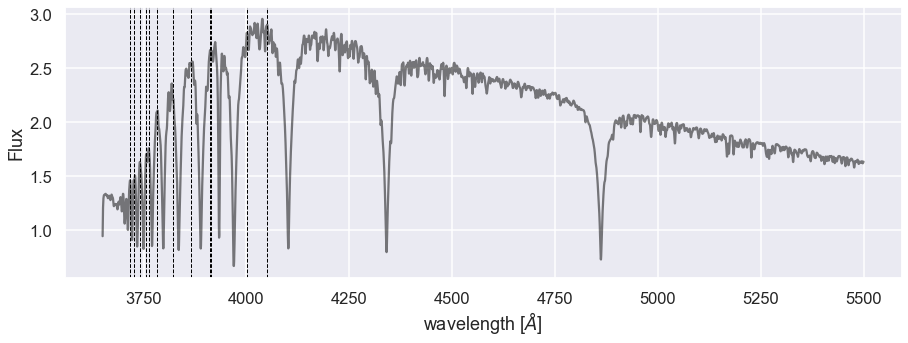

Creating config /disk-a/mejia/Research/UNAM/lvm-dap/noteboooks/simulations/_data/out/0.autodetect.3650_5500.conf ...
OUT_CONFIG=/disk-a/mejia/Research/UNAM/lvm-dap/noteboooks/simulations/_data/out/0.autodetect.3650_5500.conf
Analyzing chunk 5500 7000 ...
median_flux:0.0007 sigma_flux:0.0244
found 10 peaks!


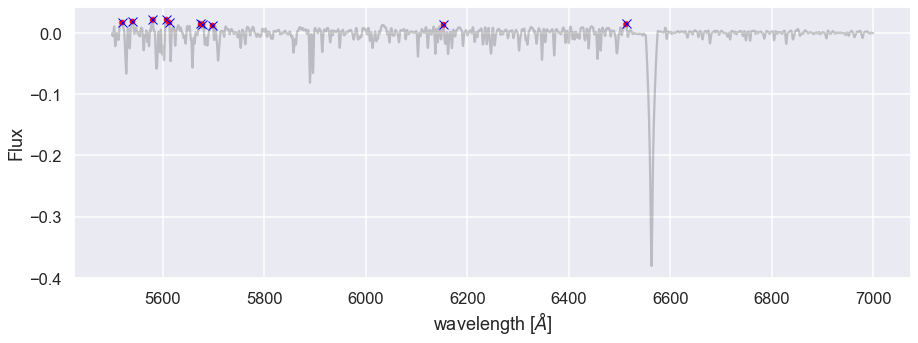

-- List crossmatch currently under develpment.
-- List crossmatch: looking for best redshift...
-- List crossmatch: best redshift for the emission lines: 0.069
list_eml_compare: EML 5754.59 AA associated to peak 6151.782441542026 AA
list_eml_compare: EML 5309.18 AA associated to peak 5672.860037261295 AA
list_eml_compare: EML 5220.06 AA associated to peak 5579.668934081346 AA
list_eml_compare: EML 5184.8 AA associated to peak 5538.80918788713 AA
list_eml_compare: EML 5333.65 AA associated to peak 5697.595477386934 AA
list_eml_compare: EML 5158.9 AA associated to peak 5518.985584473861 AA
list_eml_compare: EML 6087.0 AA associated to peak 6511.921202122593 AA
list_eml_compare: peaks found: 7


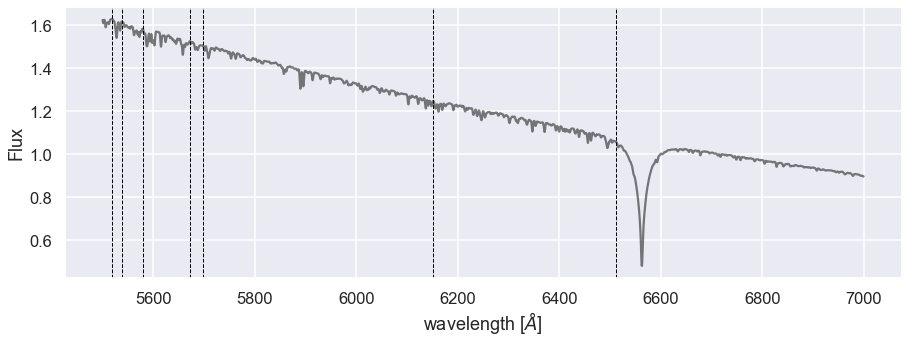

Creating config /disk-a/mejia/Research/UNAM/lvm-dap/noteboooks/simulations/_data/out/0.autodetect.5500_7000.conf ...
OUT_CONFIG=/disk-a/mejia/Research/UNAM/lvm-dap/noteboooks/simulations/_data/out/0.autodetect.5500_7000.conf
Analyzing chunk 7000 8000 ...
median_flux:0.0006 sigma_flux:0.0056
found 61 peaks!


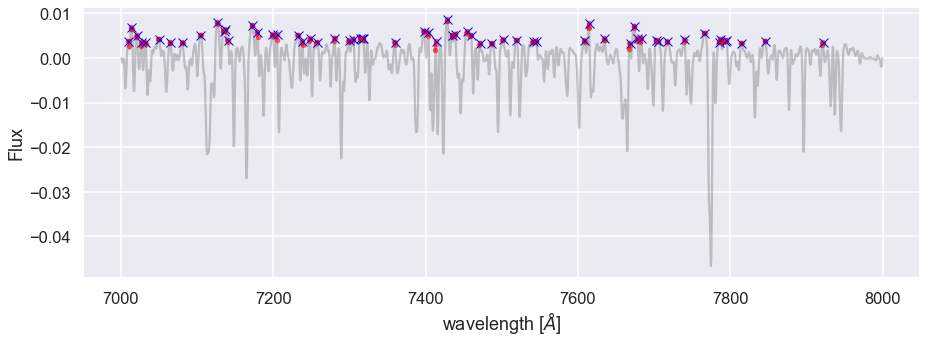

-- List crossmatch currently under develpment.
-- List crossmatch: looking for best redshift...
-- List crossmatch: best redshift for the emission lines: 0.004
list_eml_compare: EML 7686.19 AA associated to peak 7716.9254411764705 AA
list_eml_compare: EML 7290.42 AA associated to peak 7316.643404907975 AA
list_eml_compare: EML 7329.66 AA associated to peak 7359.259424935412 AA
list_eml_compare: EML 7171.98 AA associated to peak 7204.391112843824 AA
list_eml_compare: EML 7637.52 AA associated to peak 7667.62538344823 AA
list_eml_compare: EML 7751.06 AA associated to peak 7786.891728813559 AA
list_eml_compare: EML 7005.67 AA associated to peak 7031.898838465694 AA
list_eml_compare: EML 7891.8 AA associated to peak 7921.156561705457 AA
list_eml_compare: EML 7411.61 AA associated to peak 7438.219287469287 AA
list_eml_compare: EML 7291.46 AA associated to peak 7317.3690115638765 AA
list_eml_compare: EML 7281.35 AA associated to peak 7313.77538787024 AA
list_eml_compare: EML 7452.5 AA associ

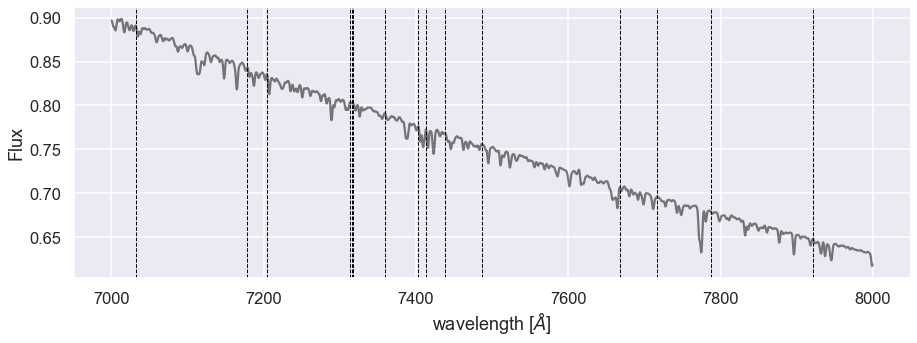

Creating config /disk-a/mejia/Research/UNAM/lvm-dap/noteboooks/simulations/_data/out/0.autodetect.7000_8000.conf ...
OUT_CONFIG=/disk-a/mejia/Research/UNAM/lvm-dap/noteboooks/simulations/_data/out/0.autodetect.7000_8000.conf
Analyzing chunk 8000 9800 ...
median_flux:0.0000 sigma_flux:0.0169
found 6 peaks!


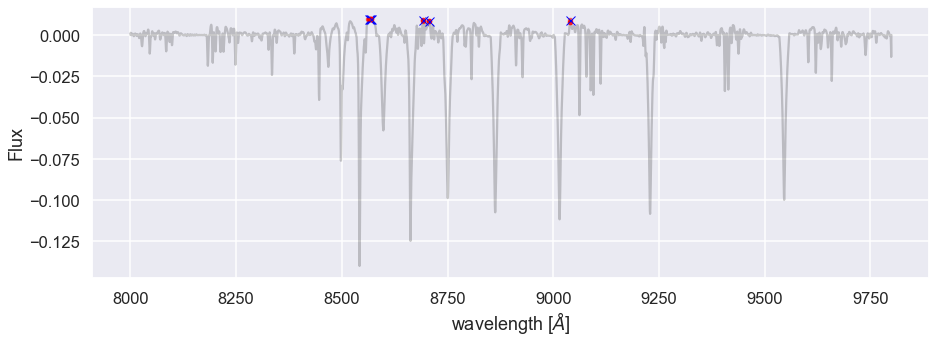

-- List crossmatch currently under develpment.
-- List crossmatch: looking for best redshift...
-- List crossmatch: best redshift for the emission lines: 0.003
list_eml_compare: EML 8665.02 AA associated to peak 8691.381616178429 AA
list_eml_compare: EML 8542.09 AA associated to peak 8566.296052631578 AA
list_eml_compare: EML 9014.91 AA associated to peak 9040.028916008157 AA
list_eml_compare: EML 8545.38 AA associated to peak 8568.965264650284 AA
list_eml_compare: peaks found: 4


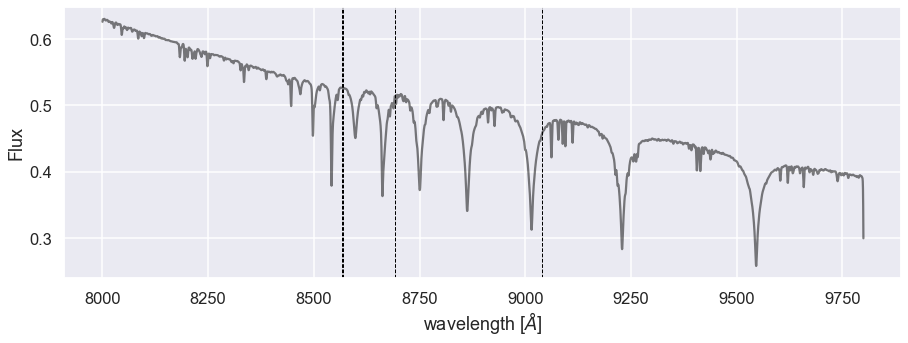

Creating config /disk-a/mejia/Research/UNAM/lvm-dap/noteboooks/simulations/_data/out/0.autodetect.8000_9800.conf ...
OUT_CONFIG=/disk-a/mejia/Research/UNAM/lvm-dap/noteboooks/simulations/_data/out/0.autodetect.8000_9800.conf


In [33]:
from pyFIT3D.common.gas_tools import detect_create_ConfigEmissionModel
from pyFIT3D.common.io import create_ConfigAutoSSP_from_lists
from pyFIT3D.common.io import create_emission_lines_file_from_list
from pyFIT3D.common.io import create_emission_lines_mask_file_from_list
from pyFIT3D.common.auto_ssp_tools import auto_ssp_elines_single_main, dump_rss_output


from lvmdap.modelling.synthesis import StellarSynthesis


elines_mask_file = "../../_fitting-data/_configs/MaNGA/emission_lines_long_list.MaNGA"
out_path = "_data/out"

input_redshift = 0
cc_redshift_boundaries = [0, 0.1]
sigma_gas = 3
spaxel_id = id_

config_filenames, wl_chunks, _, wave_peaks_tot_rf = detect_create_ConfigEmissionModel(
    wl__w[wl_mask], f__w[wl_mask],
    redshift=input_redshift,
    sigma_guess=sigma_gas,
    chunks=[(wl__w.min(),5500), (5500,7000), (7000,8000), (8000,wl__w.max())],
    polynomial_order=1,
    polynomial_coeff_guess=[0.000, 0.001],
    polynomial_coeff_boundaries=[[-1e13, 1e13], [-1e13, 1e13]],
    flux_boundaries_fact=[0.001, 1000],
    sigma_boundaries_fact=[0.1, 1.5],
    v0_boundaries_add=[-1000, 1000],
    peak_find_nsearch=1,
    peak_find_threshold=0.5,
    peak_find_dmin=1,
    crossmatch_list_filename=elines_mask_file,
    crossmatch_absdmax_AA=5,
    crossmatch_redshift_search_boundaries=cc_redshift_boundaries,
    sort_by_flux=True,
    output_path=out_path,
    label=spaxel_id,
    verbose=1,
    plot=1,
)

In [34]:
create_emission_lines_mask_file_from_list(wave_peaks_tot_rf, eline_half_range=3*sigma_gas, output_path=out_path, label=spaxel_id)
create_emission_lines_file_from_list(wave_peaks_tot_rf, output_path=out_path, label=spaxel_id)
create_ConfigAutoSSP_from_lists(wl_chunks, config_filenames, output_path=out_path, label=spaxel_id)

In [35]:
refine_gas = False

config_file = os.path.join(out_path, f"{spaxel_id}.autodetect.auto_ssp_several.config")
if not refine_gas: elines_mask_file = os.path.join(out_path, f"{spaxel_id}.autodetect.emission_lines.txt")

ssp_file = "../../_fitting-data/_basis_mastar_v3.1.1/stellar-basis-spectra-100.fits.gz"
ssp_nl_fit_file = "../../_fitting-data/_basis_mastar_v3.1.1/stellar-basis-spectra-10.fits.gz"

mask_list = None

sigma_inst = 0.001#np.sqrt(2.63**2 - 0.5**2) / 2.355
min, max = 0, f__w.max()
fit_gas = True

w_min, w_max = wl__w.min(), wl__w.max()
nl_w_min, nl_w_max = 3800, 4700

input_redshift, delta_redshift, min_redshift, max_redshift = 0, 0, 0, 0.1
input_sigma, delta_sigma, min_sigma, max_sigma = 0, 0, 0, 350
input_AV, delta_AV, min_AV, max_AV = 0, 0, 0, 1.5

plot = 0
ratio = True
y_ratio = None
fit_sigma_rnd = True

cf, SPS = auto_ssp_elines_single_main(
    wl__w, f__w, ef__w, ssp_file,
    config_file=config_file,
    ssp_nl_fit_file=ssp_nl_fit_file, sigma_inst=sigma_inst, out_file="NOT_USED",
    mask_list=mask_list, elines_mask_file=elines_mask_file, fit_gas=fit_gas,
    min=min, max=max, w_min=w_min, w_max=w_max, nl_w_min=nl_w_min, nl_w_max=nl_w_max,
    input_redshift=input_redshift, delta_redshift=delta_redshift,
    min_redshift=min_redshift, max_redshift=max_redshift,
    input_sigma=input_sigma, delta_sigma=delta_sigma, min_sigma=min_sigma, max_sigma=max_sigma,
    input_AV=input_AV, delta_AV=delta_AV, min_AV=min_AV, max_AV=max_AV,
    plot=plot, single_ssp=False, ratio=ratio, y_ratio=y_ratio, fit_sigma_rnd=fit_sigma_rnd,
    sps_class=StellarSynthesis
)

ipykernel_launcher.py: no mask list file
-> median error in flux = 0.0000
-> median raw flux = 0.9658 - Warning: no cut (CUT_MEDIAN_FLUX = 0)
Deriving redshift, sigma, AV...
- Redshift: 0.00000000 +- 0.00000000
- Sigma:    0.00000000 +- 0.00000000
- AV:       0.00000000 +- 0.00000000
Deriving redshift, sigma, AV... DONE!
Normalization window = [5455, 5545]
Signal-to-Noise inside normalization window = 145.1494822737076
Deriving SFH... attempt 1 of 1


/home/mejia/.cache/pypoetry/virtualenvs/lvm-dap-fAIgvtcU-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mejia/.cache/pypoetry/virtualenvs/lvm-dap-fAIgvtcU-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Gas fit...
-> analyzing 13 models in 3681-4036 wavelength range
ipykernel_launcher.py: [StPopSynth._EL_fit()]: no mask list file
guided...
3758.9 - guided vel = 0.0 (-100.0000, 100.0000)3889.05 - guided vel = 0.0 (-100.0000, 100.0000)3797.9 - guided vel = 0.0 (-100.0000, 100.0000)3888.65 - guided vel = 0.0 (-100.0000, 100.0000)3728.82 - guided vel = 0.0 (-100.0000, 100.0000)3691.56 - guided vel = 0.0 (-100.0000, 100.0000)3711.97 - guided vel = 0.0 (-100.0000, 100.0000)3703.85 - guided vel = 0.0 (-100.0000, 100.0000)3835.38 - guided vel = 0.0 (-100.0000, 100.0000)3734.37 - guided vel = 0.0 (-100.0000, 100.0000)4026.19 - guided vel = 0.0 (-100.0000, 100.0000)3970.07 - guided vel = 0.0 (-100.0000, 100.0000)
-> real number of loops = 200
-> number of models = 13 | chi^2 = 3.352480929403449e+23
         -------------------------------------------------------------------------------------------------
         |         wave          |         flux          |         sigma         |          

/disk-a/mejia/Research/UNAM/lvm-dap/lvmdap/modelling/synthesis.py:321: RuntimeWarning: invalid value encountered in true_divide
  _coeffs_norm = _coeffs/norm
/disk-a/mejia/Research/UNAM/lvm-dap/lvmdap/modelling/synthesis.py:325: RuntimeWarning: invalid value encountered in true_divide
  _min_coeffs_norm = _min_coeffs/norm


Text(0, 0.5, 'flux ($\\mathrm{L}_\\odot$)')

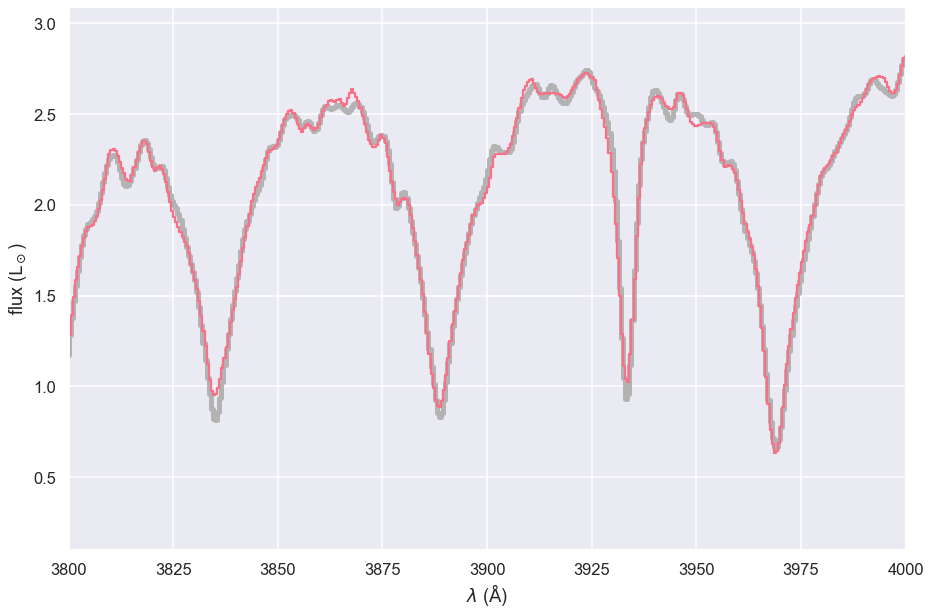

In [37]:
obs = SPS.spectra["orig_flux_ratio"]
model = SPS.spectra["model_joint"]

fig, ax = plt.subplots(figsize=(15,10))
plt.step(wl__w, obs, "0.7", lw=5)
plt.step(wl__w, model)
# plt.xlim(6540,6600)
plt.xlim(3800,4000)
plt.xlabel("$\lambda$ ($\mathrm{\AA}$)")
plt.ylabel("flux ($\mathrm{L}_\odot$)")